# Hypothesis Testing

In this notebook, we're going to investigate some pseudo-random, fabricated data to understand how to decide whether a coefficient in a linear regression is statistically significant.  First, we'll import our libraries:

In [124]:
import numpy as np
from numpy import random
import statsmodels.api as sm
from statsmodels.regression.linear_model import RegressionResults
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

We'll generate 100 coordinates for each of five slopes with a random element in the y-value:

In [125]:
line_df = pd.DataFrame(columns = ['slope', 'x', 'y'])
for m in np.arange(-0.5, 0.1, 0.1):
    count = 0
    intercept = 1
    slopelet = pd.DataFrame()
    while count < 100:
        for i in np.arange(0, 1, 0.001):
                slopelet.loc[i, 'slope'] = m
                slopelet.loc[i, 'x'] = i
                slopelet.loc[i, 'y'] = m*i + intercept + random.random()
                count += 1
    line_df = pd.concat([line_df, slopelet], axis = 0)
    
line_df.reset_index(drop = True, inplace = True)

In [126]:
line_df['slope'].value_counts()

-1.000000e-01    1000
-3.000000e-01    1000
-4.000000e-01    1000
-2.000000e-01    1000
-1.110223e-16    1000
-5.000000e-01    1000
Name: slope, dtype: int64

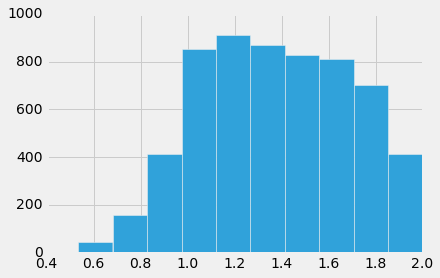

In [134]:
line_df['y'].hist()
plt.show()

In [141]:
#for slope in np.arange(-0.5, 0, 0.01):
slope = -0.5

df = line_df.loc[line_df['slope'] == slope]
x = df[['x']]
X = pd.DataFrame(sm.add_constant(x))
X.columns = ['constant', 'x']
y = line_df.loc[line_df['slope'] == slope, 'y']
ols = sm.OLS(X, y)
ols_result = ols.fit()
results = RegressionResults(ols, X, y)

In [144]:
results.pvalue

AttributeError: 'RegressionResults' object has no attribute 'pvalue'

## SLOPE = -0.5

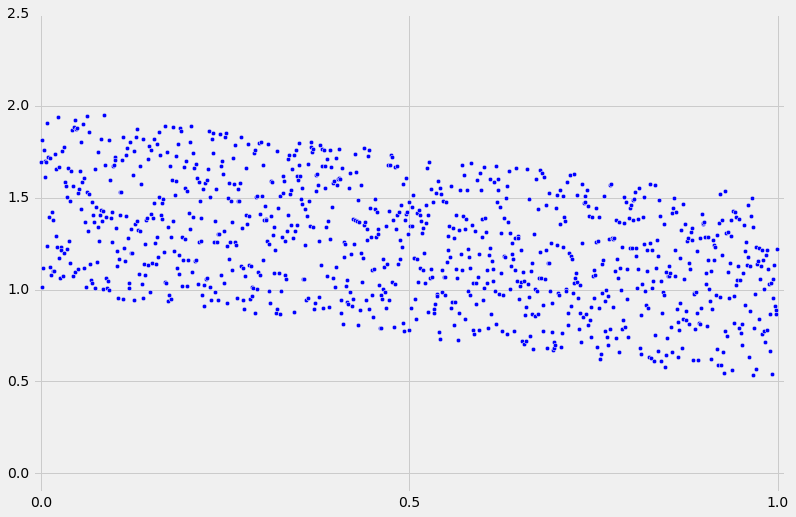

In [127]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,8))

slope = -0.5

lil_df = line_df.loc[line_df['slope'] == slope, :]

plt.scatter(lil_df['x'], lil_df['y'])

plt.ylim([-0.1, 2.5])
plt.yticks(np.arange(-0, 3.0, 0.5), fontsize = 14)

plt.xlim([-0.01, 1.01])
plt.xticks(np.arange(0, 1.1, 0.5), fontsize = 14)

plt.show()

In [128]:
x = lil_df[['x']]
X = pd.DataFrame(sm.add_constant(x))
X.columns = ['constant', 'x']

y = lil_df['y']
ols = sm.OLS(y, X)

ols_result = ols.fit()

ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     246.5
Date:                Tue, 21 Mar 2017   Prob (F-statistic):           8.32e-50
Time:                        16:46:44   Log-Likelihood:                -154.85
No. Observations:                1000   AIC:                             313.7
Df Residuals:                     998   BIC:                             323.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
constant       1.4908      0.018     83.419      0.000         1.456     1.526
x             -0.4863      0.031    -15.699      0.000        -0.547    -0.426
==============================================================================
Omnibus:                      496.164   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.721
Skew:                          -0.003   Prob(JB):                     1.31e-12
Kurtosis:                       1.854   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## SLOPE = 0

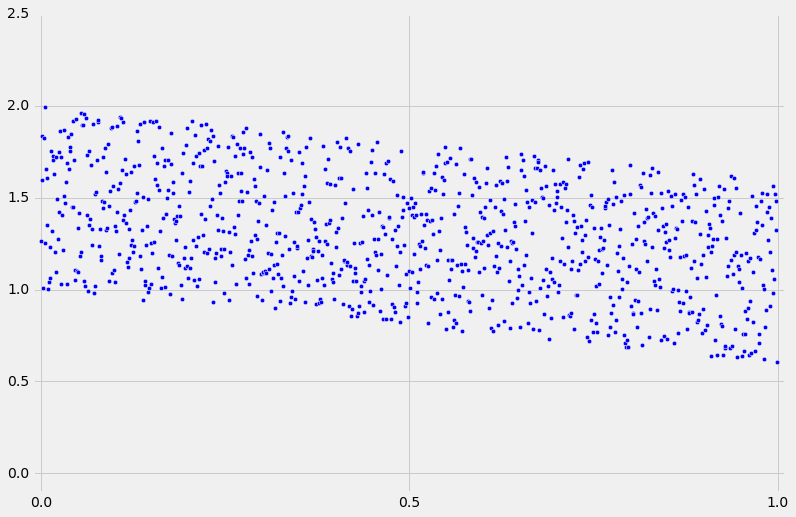

In [130]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,8))

slope = -0.4

lil_df = line_df.loc[line_df['slope'] == slope, :]

plt.scatter(lil_df['x'], lil_df['y'])

plt.ylim([-0.1, 2.5])
plt.yticks(np.arange(-0, 3.0, 0.5), fontsize = 14)

plt.xlim([-0.01, 1.01])
plt.xticks(np.arange(0, 1.1, 0.5), fontsize = 14)

plt.show()

In [131]:
x = lil_df[['x']]
X = pd.DataFrame(sm.add_constant(x))
X.columns = ['constant', 'x']

y = lil_df['y']
ols = sm.OLS(y, X)

ols_result = ols.fit()

ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     153.0
Date:                Tue, 21 Mar 2017   Prob (F-statistic):           8.47e-33
Time:                        16:47:15   Log-Likelihood:                -173.88
No. Observations:                1000   AIC:                             351.8
Df Residuals:                     998   BIC:                             361.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
constant       1.4915      0.018     81.887      0.000         1.456     1.527
x             -0.3905      0.032    -12.369      0.000        -0.452    -0.329
==============================================================================
Omnibus:                      593.216   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.386
Skew:                           0.033   Prob(JB):                     3.46e-13
Kurtosis:                       1.828   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# SLOPE = -0.3

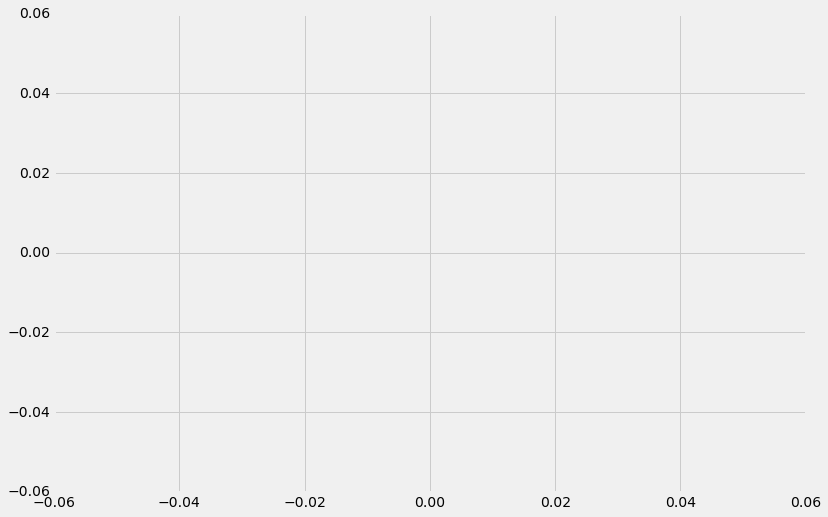

In [109]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,8))

lil_neg03 = line_df.loc[line_df['slope'] == -0.3, :]

plt.scatter(lil_neg03['x'], lil_neg03['y'])

# plt.ylim([-0.1, 2.5])
# plt.yticks(np.arange(-0, 3.0, 0.5), fontsize = 14)

# plt.xlim([-0.01, 1.01])
# plt.xticks(np.arange(0, 1.1, 0.5), fontsize = 14)

plt.show()

In [110]:
lil_neg03

,slope,x,y
